# Comparison of Wide Binaries from El-Badry and Rix (2018)

https://ui.adsabs.harvard.edu/abs/2018MNRAS.480.4884E

### Author(s): Sven Buder (SB, WG4)

#### History
200330: SB Created


In [46]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import os
import sys
import scipy
import collections
import glob
import pickle
import pandas
from astropy.stats import sigma_clipped_stats

# Packages to work with FITS and (IDL) SME.out files
import astropy.io.fits as pyfits
import astropy.table as table
from astropy.table import Table, hstack, vstack, join
from scipy.io.idl import readsav

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

class read_iso():

    def __init__(self):
        self.num_cols=4
        self.columns = ['M_Mo', 'logTeff', 'logG', 'logL_Lo', 'Ks']
        self.num_ages = len(age)
        self.ages = age

    def fill_chemistry(self, m_h, fe_h, alpha_fe):
        self.FeH = fe_h
        self.Z = 10**m_h*0.0152
        self.aFe = alpha_fe

    def fill_iso(self, iso_input):
        self.data = iso_input




In [47]:
dr3_l = Table.read('../../../catalogs/GALAH_DR3_main.fits')
dr3_l['sobject_id_1'] = dr3_l['sobject_id']
dr3_r = Table.read('../../../catalogs/GALAH_DR3_main.fits')
dr3_r['sobject_id_2'] = dr3_r['sobject_id']

In [48]:
elbadry = Table.read('GALAH_DR3_ElBadry_sobject_ids.fits')

In [49]:
left = join(elbadry, dr3_l, keys='sobject_id_1',table_names = ['l1','l2'])
wb_pairs = join(left, dr3_r, keys='sobject_id_2',table_names = ['r1','r2'])

All Wide Binaries: 268
Unflagged Binaries (flag_sp <= 127): 252
Binaries with [Fe/H] difference above 0.25 dex: 8


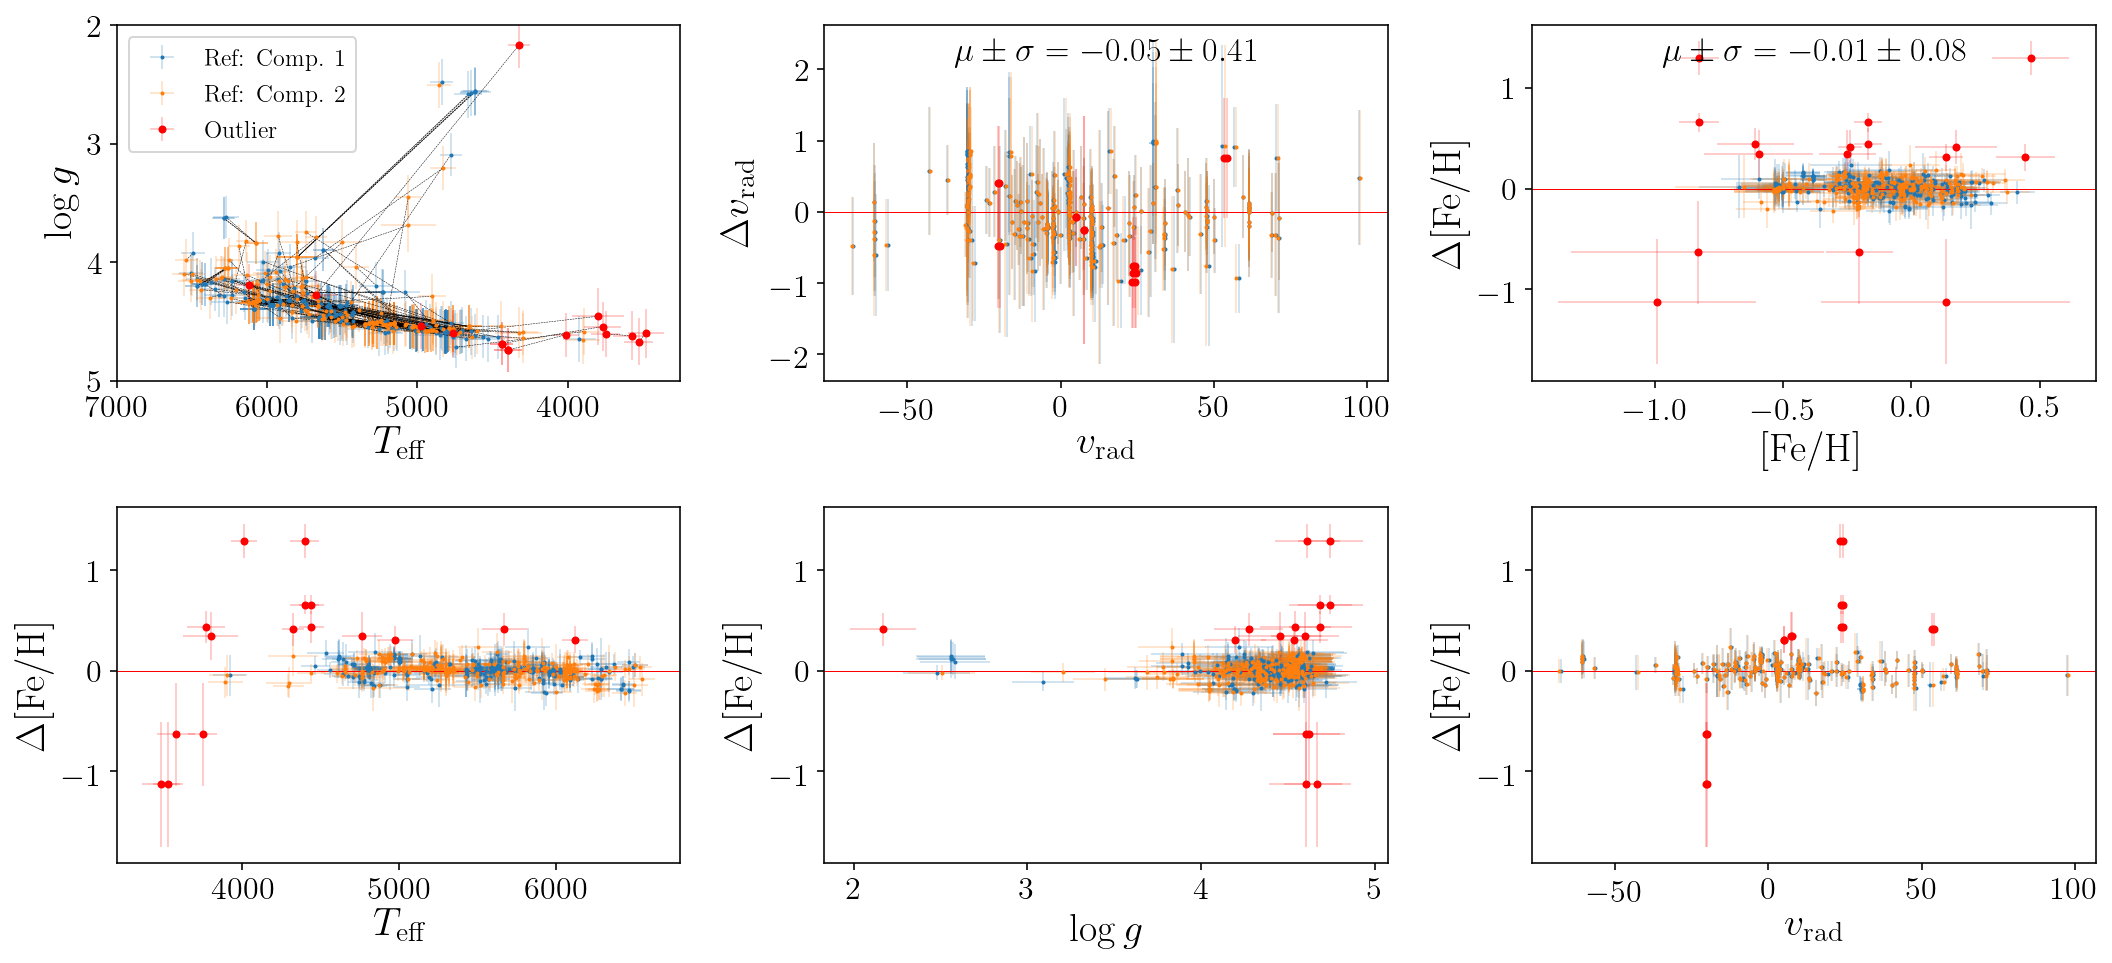

In [99]:
def plot_WB_stellar_parameters(flag=8):
    
    f, gs = plt.subplots(2,3,figsize=(15,7))
    
    unflagged = (wb_pairs['flag_sp_r1'] <= flag) & (wb_pairs['flag_sp_r2'] <= flag) & (np.abs(wb_pairs['fe_h_r2']-wb_pairs['fe_h_r1']) < 0.25) & (np.abs(wb_pairs['rv_galah_r2']-wb_pairs['rv_galah_r1']) < 1)
    
    outlier = (wb_pairs['flag_sp_r1'] <= flag) & (wb_pairs['flag_sp_r2'] <= flag) & (np.abs(wb_pairs['fe_h_r2']-wb_pairs['fe_h_r1']) > 0.25) & (np.abs(wb_pairs['rv_galah_r2']-wb_pairs['rv_galah_r1']) < 1)
    
    print('All Wide Binaries:',len(wb_pairs['teff_r1'][(np.abs(wb_pairs['rv_galah_r2']-wb_pairs['rv_galah_r1']) < 1)]))
    print('Unflagged Binaries (flag_sp <= '+str(flag)+'):',len(wb_pairs['teff_r1'][unflagged]))
    print('Binaries with [Fe/H] difference above 0.25 dex:',len(wb_pairs['teff_r1'][outlier]))

    kwargs = dict(fmt='o',lw=0.2,ms=1)
    kwargs_outlier = dict(c='r',fmt='o',lw=0.2,ms=3)
    
    ax = gs[0,0]
    
    ax.errorbar(
        wb_pairs['teff_r1'][unflagged],
        wb_pairs['logg_r1'][unflagged],
        xerr = wb_pairs['e_teff_r1'][unflagged],
        yerr = wb_pairs['e_logg_r1'][unflagged],
        label='Ref: Comp. 1',
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r2'][unflagged],
        wb_pairs['logg_r2'][unflagged],
        xerr = wb_pairs['e_teff_r2'][unflagged],
        yerr = wb_pairs['e_logg_r2'][unflagged],
        label='Ref: Comp. 2',
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r1'][outlier],
        wb_pairs['logg_r1'][outlier],
        xerr = wb_pairs['e_teff_r1'][outlier],
        yerr = wb_pairs['e_logg_r1'][outlier],
        label='Outlier',
        **kwargs_outlier
    )
    ax.errorbar(
        wb_pairs['teff_r2'][outlier],
        wb_pairs['logg_r2'][outlier],
        xerr = wb_pairs['e_teff_r2'][outlier],
        yerr = wb_pairs['e_logg_r2'][outlier],
        **kwargs_outlier
    )
    ax.plot(
        [wb_pairs['teff_r1'][unflagged],wb_pairs['teff_r2'][unflagged]],
        [wb_pairs['logg_r1'][unflagged],wb_pairs['logg_r2'][unflagged]],
        c='k',lw=0.25,ls='dashed'
    )
    ax.plot(
        [wb_pairs['teff_r1'][outlier],wb_pairs['teff_r2'][outlier]],
        [wb_pairs['logg_r1'][outlier],wb_pairs['logg_r2'][outlier]],
        c='k',lw=0.25,ls='dashed'
    )
    ax.set_xlim(7000,3250)
    ax.set_ylim(5,2.)
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\log g$')
    ax.legend(fontsize=12)
    
    ax = gs[0,1]
    ax.errorbar(
        wb_pairs['rv_galah_r1'][unflagged],
        wb_pairs['rv_galah_r2'][unflagged]-wb_pairs['rv_galah_r1'][unflagged],
        xerr = wb_pairs['e_rv_galah_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_rv_galah_r2'][unflagged]**2 + wb_pairs['e_rv_galah_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['rv_galah_r2'][unflagged],
        wb_pairs['rv_galah_r2'][unflagged]-wb_pairs['rv_galah_r1'][unflagged],
        xerr = wb_pairs['e_rv_galah_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_rv_galah_r2'][unflagged]**2 + wb_pairs['e_rv_galah_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['rv_galah_r2'][outlier],
        wb_pairs['rv_galah_r2'][outlier]-wb_pairs['rv_galah_r1'][outlier],
        xerr = wb_pairs['e_rv_galah_r2'][outlier],
        yerr = np.sqrt(wb_pairs['e_rv_galah_r2'][outlier]**2 + wb_pairs['e_rv_galah_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.errorbar(
        wb_pairs['rv_galah_r1'][outlier],
        wb_pairs['rv_galah_r2'][outlier]-wb_pairs['rv_galah_r1'][outlier],
        xerr = wb_pairs['e_rv_galah_r1'][outlier],
        yerr = np.sqrt(wb_pairs['e_rv_galah_r2'][outlier]**2 + wb_pairs['e_rv_galah_r1'][outlier]**2),
        **kwargs_outlier
    )
    mean = np.mean(wb_pairs['rv_galah_r2'][unflagged]-wb_pairs['rv_galah_r1'][unflagged])
    std = np.std(wb_pairs['rv_galah_r2'][unflagged]-wb_pairs['rv_galah_r1'][unflagged])
    ax.text(0.5,0.9,r'$\mu \pm \sigma = '+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center')
    ax.axhline(0,c='r',lw=0.5)
    ax.set_xlabel(r'$v_\text{rad}$')
    ax.set_ylabel(r'$\Delta v_\text{rad}$')
    
    ax = gs[0,2]
    ax.errorbar(
        wb_pairs['fe_h_r1'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_fe_h_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r1'][unflagged]**2+wb_pairs['e_fe_h_r2'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['fe_h_r2'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_fe_h_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r1'][unflagged]**2+wb_pairs['e_fe_h_r2'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['fe_h_r2'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_fe_h_r2'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r1'][outlier]**2+wb_pairs['e_fe_h_r2'][outlier]**2),
        **kwargs_outlier
    )
    ax.errorbar(
        wb_pairs['fe_h_r1'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_fe_h_r1'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r1'][outlier]**2+wb_pairs['e_fe_h_r2'][outlier]**2),
        **kwargs_outlier
    )
    mean = np.mean(wb_pairs['fe_h_r1'][unflagged]-wb_pairs['fe_h_r2'][unflagged])
    std = np.std(wb_pairs['fe_h_r1'][unflagged]-wb_pairs['fe_h_r2'][unflagged])
    ax.text(0.5,0.9,r'$\mu \pm \sigma = '+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center')
    ax.axhline(0,c='r',lw=0.5)
    ax.set_xlabel(r'[Fe/H]')
    ax.set_ylabel(r'$\Delta$[Fe/H]')
    
    ax = gs[1,0]
    ax.errorbar(
        wb_pairs['teff_r1'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_teff_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][unflagged]**2 + wb_pairs['e_fe_h_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r2'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_teff_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][unflagged]**2 + wb_pairs['e_fe_h_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r1'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_teff_r1'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][outlier]**2 + wb_pairs['e_fe_h_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.errorbar(
        wb_pairs['teff_r2'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_teff_r2'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][outlier]**2 + wb_pairs['e_fe_h_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\Delta$[Fe/H]')
    ax.axhline(0,c='r',lw=0.5)

    ax = gs[1,1]
    ax.errorbar(
        wb_pairs['logg_r1'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_logg_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][unflagged]**2 + wb_pairs['e_fe_h_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['logg_r2'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_logg_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][unflagged]**2 + wb_pairs['e_fe_h_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['logg_r1'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_logg_r1'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][outlier]**2 + wb_pairs['e_fe_h_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.errorbar(
        wb_pairs['logg_r2'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_logg_r2'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][outlier]**2 + wb_pairs['e_fe_h_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.set_xlabel(r'$\log g$')
    ax.set_ylabel(r'$\Delta$[Fe/H]')
    ax.axhline(0,c='r',lw=0.5)
    
    ax = gs[1,2]
    ax.errorbar(
        wb_pairs['rv_galah_r1'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_rv_galah_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][unflagged]**2 + wb_pairs['e_fe_h_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['rv_galah_r2'][unflagged],
        wb_pairs['fe_h_r2'][unflagged]-wb_pairs['fe_h_r1'][unflagged],
        xerr = wb_pairs['e_rv_galah_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][unflagged]**2 + wb_pairs['e_fe_h_r1'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['rv_galah_r1'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_rv_galah_r1'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][outlier]**2 + wb_pairs['e_fe_h_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.errorbar(
        wb_pairs['rv_galah_r2'][outlier],
        wb_pairs['fe_h_r2'][outlier]-wb_pairs['fe_h_r1'][outlier],
        xerr = wb_pairs['e_rv_galah_r2'][outlier],
        yerr = np.sqrt(wb_pairs['e_fe_h_r2'][outlier]**2 + wb_pairs['e_fe_h_r1'][outlier]**2),
        **kwargs_outlier
    )
    ax.set_xlabel(r'$v_\text{rad}$')
    ax.set_ylabel(r'$\Delta$[Fe/H]')
    ax.axhline(0,c='r',lw=0.5)

    plt.tight_layout()
    
    plt.savefig('../../../dr3_release_paper/figures/wide_binaries_sp.png',bbox_inches='tight',dpi=200)

plot_WB_stellar_parameters(flag=0+1+2+4+8+16+32+64);

In [153]:
latex_text = [
    ['\\begin{table}'],
    ['\\centering'],
    ['\\caption{Comparison of element abundances of wide binaries in GALAH DR3.} \\label{tab:wide_binary_ab}'],
    ['\\begin{tabular}{ccc}'],
    ['\\hline'],
    [r'Elem. & Avg.$\pm$Std. & Avg. \texttt{e\_X\_fe} \\'],
    ['\\hline'],
]

left_right = [
    'alpha','Ni','Li','Cu','C','Zn',
    'O','Rb','Na','Sr','Mg','Y','Al',
    'Zr','Si','Mo','K','Ru','Ca','Ba',
    'Sc','La','Ti','Ce','Ti2','Nd',
    'V','Sm','Cr','Eu','Mn'
]

for elem in ['Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
    
    
    unflagged = (
        (wb_pairs['flag_sp_r1'] == 0) & 
        (wb_pairs['flag_sp_r2'] == 0) & 
        (wb_pairs['flag_'+elem+'_fe_r1'] == 0) & 
        (wb_pairs['flag_'+elem+'_fe_r2'] == 0) &
        (np.abs(wb_pairs['fe_h_r2']-wb_pairs['fe_h_r1']) < 0.25) & 
        (np.abs(wb_pairs['rv_galah_r2']-wb_pairs['rv_galah_r1']) < 1)
    )
    
    if len(wb_pairs[elem+'_fe_r2'][unflagged]) > 5:
        mean = np.mean(wb_pairs[elem+'_fe_r2'][unflagged]-wb_pairs[elem+'_fe_r1'][unflagged])
        std = np.std(wb_pairs[elem+'_fe_r2'][unflagged]-wb_pairs[elem+'_fe_r1'][unflagged])
        unc = np.mean(np.concatenate((np.array([wb_pairs['e_'+elem+'_fe_r2'][unflagged],wb_pairs['e_'+elem+'_fe_r1'][unflagged]]))))
        txt = "{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$ & '+"{:.2f}".format(unc)
    else:
        txt = '-$ & -'

    latex_text.append([elem+' & $'+txt+' \\\\'])
        
latex_text.append(['\\hline'])
latex_text.append(['\\end{tabular}'])
latex_text.append(['\\end{table}'])

np.savetxt('../../../dr3_release_paper/tables/wide_binary_ab.tex',np.array(latex_text),fmt='%s')

In [148]:
def plot_WB_ab(elem):
    
    f, gs = plt.subplots(1,3,figsize=(15,3))
    
    unflagged = (
        (wb_pairs['flag_sp_r1'] == 0) & 
        (wb_pairs['flag_sp_r2'] == 0) & 
        (wb_pairs['flag_'+elem+'_fe_r1'] == 0) & 
        (wb_pairs['flag_'+elem+'_fe_r2'] == 0) &
        (np.abs(wb_pairs['fe_h_r2']-wb_pairs['fe_h_r1']) < 0.25) & 
        (np.abs(wb_pairs['rv_galah_r2']-wb_pairs['rv_galah_r1']) < 1)
    )
    flagged = (
        (wb_pairs['flag_sp_r1'] > 0) & 
        (wb_pairs['flag_sp_r2'] > 0) & 
        (wb_pairs['flag_'+elem+'_fe_r1'] > 0) & 
        (wb_pairs['flag_'+elem+'_fe_r2'] > 0) &
        (np.abs(wb_pairs['fe_h_r2']-wb_pairs['fe_h_r1']) < 0.25) & 
        (np.abs(wb_pairs['rv_galah_r2']-wb_pairs['rv_galah_r1']) < 1)
    )
    
    kwargs = dict(fmt='o',lw=0.2, ms=1)
    kwargs_flagged = dict(fmt='o',lw=0.2, c='r', ms=3)
    ax = gs[0]

    ax.errorbar(
        wb_pairs['teff_r1'][unflagged],
        wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged],
        xerr = wb_pairs['e_teff_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][unflagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][unflagged]**2),
        label='Ref: Comp. 1',
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r2'][unflagged],
        wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged],
        xerr = wb_pairs['e_teff_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][unflagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][unflagged]**2),
        label='Ref: Comp. 2',
        **kwargs
    )

    ax.errorbar(
        wb_pairs['teff_r1'][flagged],
        wb_pairs[elem+'_fe_r1'][flagged]-wb_pairs[elem+'_fe_r2'][flagged],
        xerr = wb_pairs['e_teff_r1'][flagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][flagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][flagged]**2),
        label='Flagged',
        **kwargs_flagged
    )
    ax.errorbar(
        wb_pairs['teff_r2'][flagged],
        wb_pairs[elem+'_fe_r1'][flagged]-wb_pairs[elem+'_fe_r2'][flagged],
        xerr = wb_pairs['e_teff_r2'][flagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][flagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][flagged]**2),
        **kwargs_flagged
    )
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\Delta$['+elem+'/Fe]')
    ax.axhline(0,c='r',lw=0.5)
    ax.legend(fontsize=12)

    ax = gs[1]

    ax.errorbar(
        wb_pairs['teff_r1'][unflagged],
        wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged],
        xerr = wb_pairs['e_teff_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][unflagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r2'][unflagged],
        wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged],
        xerr = wb_pairs['e_teff_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][unflagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['teff_r1'][flagged],
        wb_pairs[elem+'_fe_r1'][flagged]-wb_pairs[elem+'_fe_r2'][flagged],
        xerr = wb_pairs['e_teff_r1'][flagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][flagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][flagged]**2),
        **kwargs_flagged
    )
    ax.errorbar(
        wb_pairs['teff_r2'][flagged],
        wb_pairs[elem+'_fe_r1'][flagged]-wb_pairs[elem+'_fe_r2'][flagged],
        xerr = wb_pairs['e_teff_r2'][flagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][flagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][flagged]**2),
        **kwargs_flagged
    )
    if len(wb_pairs['teff_r1'][unflagged]) > 1:
        mean = np.mean(wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged])
        std = np.std(wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged])
        ax.text(0.5,0.9,r'$\mu \pm \sigma = '+"{:.2f}".format(mean)+'\pm'+"{:.2f}".format(std)+'$',transform=ax.transAxes,ha='center')
    ax.set_xlabel(r'$T_\text{eff}$')
    ax.set_ylabel(r'$\Delta$['+elem+'/Fe]')
    ax.axhline(0,c='r',lw=0.5)

    ax = gs[2]
    ax.errorbar(
        wb_pairs['logg_r1'][unflagged],
        wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged],
        xerr = wb_pairs['e_logg_r1'][unflagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][unflagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['logg_r2'][unflagged],
        wb_pairs[elem+'_fe_r1'][unflagged]-wb_pairs[elem+'_fe_r2'][unflagged],
        xerr = wb_pairs['e_logg_r2'][unflagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][unflagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][unflagged]**2),
        **kwargs
    )
    ax.errorbar(
        wb_pairs['logg_r1'][flagged],
        wb_pairs[elem+'_fe_r1'][flagged]-wb_pairs[elem+'_fe_r2'][flagged],
        xerr = wb_pairs['e_logg_r1'][flagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][flagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][flagged]**2),
        **kwargs_flagged
    )
    ax.errorbar(
        wb_pairs['logg_r2'][flagged],
        wb_pairs[elem+'_fe_r1'][flagged]-wb_pairs[elem+'_fe_r2'][flagged],
        xerr = wb_pairs['e_logg_r2'][flagged],
        yerr = np.sqrt(wb_pairs['e_'+elem+'_fe_r1'][flagged]**2 + wb_pairs['e_'+elem+'_fe_r2'][flagged]**2),
        **kwargs_flagged
    )
    ax.set_xlabel(r'$\log g$')
    ax.set_ylabel(r'$\Delta$['+elem+'/Fe]')
    ax.axhline(0,c='r',lw=0.5)
    
    plt.tight_layout()
    
    plt.savefig('wide_binaries_'+elem+'.png',bbox_inches='tight',dpi=200)
    plt.close()

for elem in ['alpha','Li','C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','Ti2','V','Cr','Mn','Ni','Cu','Zn','Rb','Sr','Y','Zr','Mo','Ru','Ba','La','Ce','Nd','Sm','Eu']:
    plot_WB_ab(elem);    

/Users/svenbuder/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
